In [254]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D

In [255]:
# update the velocity of the particules
def update_velocity(particles, velocity, pbest, gbest, vmax_x, vmax_y):
    
    r1 = np.random.uniform(0, 1) # choose randomly r1 between 0 and 1
    r2 = np.random.uniform(0, 1)
    inertia = w * velocity # the inertia term 
    cognitive = c1 * r1 * (pbest - particles) # the term of individual exploration
    social = c2 * r2 * (particles - gbest) # the term of global search
    new_velocity = inertia + cognitive - social # it adds up to give the new velocity 

    # for the velocity on the axis x

    idx = np.where(new_velocity[0, :] > vmax_x) # take all the velocities greater than the clamping velocity 
    new_velocity[0, :][idx] = vmax_x # fix the large velocities to vmax
    idx = np.where(new_velocity[0, :] < -vmax_x) # likewise but for negative velocities
    new_velocity[0, :][idx] = -vmax_x

    # for the velocity on the axis the axis y


    idx = np.where(new_velocity[1, :] > vmax_y) # take all the velocities greater than the clamping velocity 
    new_velocity[1, :][idx] = vmax_y # fix the large velocities to vmax
    idx = np.where(new_velocity[1, :] < -vmax_y) # likewise but for negative velocities
    new_velocity[1, :][idx] = -vmax_y

    return new_velocity



In [256]:
def update_position(particles, velocity):
    
    new_particles = particles + velocity # moving the particles

    # for the axis x
    
    idx = np.where(new_particles[0, :]  > x_sup) # take the particles that do not satisfy the constraint 
    new_particles[0, :][idx] = x_sup # block the particle at the upper-bound
    idx = np.where(new_particles[0, :][idx] < x_inf) # same for the lower bound
    new_particles[0, :][idx] = x_inf

    # for the axis y


    idx = np.where(new_particles[1, :]  > y_sup) # take the particles that do not satisfy the constraint 
    new_particles[1, :][idx] = y_sup # block the particle at the upper-bound
    idx = np.where(new_particles[1, :][idx] < y_inf) # same for the lower bound
    new_particles[1, :][idx] = y_inf


    return new_particles 


In [257]:
def update_best(pbest, gbest, particles):
    obj = np.apply_along_axis(function, axis=0, arr=particles)# compute the new objectives
    if obj.min() < function(gbest): # if a new best global is reached we take it
        gbest = particles[:,np.argmin(obj)]

    idx = np.where(obj < np.apply_along_axis(function, axis=0, arr=pbest)) # we update the personal bests 
    pbest[:,idx] = particles[:,idx]
    return pbest, gbest.reshape(-1, 1)


In [258]:
def run_pso(N, T, c1, c2, w, k, x_inf, x_sup, y_inf, y_sup, function):

    vmax_x = k*(x_sup - x_inf)/2
    vmax_y = k*(y_sup - y_inf)/2  # The clamping velocity 
    

    # Initialization

    particles = np.stack((np.random.uniform(x_inf, x_sup, N), np.random.uniform(y_inf, y_sup, N)), axis=0) # take randomly N initial particles 
    velocity = np.zeros_like(particles) # set the velocities to zeo at the beginning 
    pbest = np.copy(particles) # the personal bests position are the initial positions 
    gbest = pbest[:,np.argmin(np.apply_along_axis(function, axis=0, arr=pbest))].reshape(-1, 1)# the global best is the minimum 
    minimizer = []
    dynamic = [np.copy(particles)]# we store the trajectory of the particles 

    for _ in tqdm(range(T)): # we loop T times to have a dynamic of T periods 

            
        velocity = update_velocity(particles, velocity, pbest, gbest, vmax_x, vmax_y) # compute the velocity 
        particles = update_position(particles, velocity) # new particles 
        dynamic.append(np.copy(particles)) # store the new population 
        pbest, gbest = update_best(pbest, gbest, particles) # update the best postions 
        minimizer.append(gbest)

    return minimizer, dynamic # return the best position and the trajectory 


### Example of the paraboloid

In [266]:
def test(x):
    return x[0]**2 + x[1]**2
    


In [267]:
c1, c2, w, k = 1.9, 1, 0.9, 0.5 # to compute the velocity 
T = 30 # Time 
N = 20 # Number of particles 
x_inf = -5 # upper bound
x_sup = 5 # lower bound
y_inf = -5 # upper bound
y_sup = 5 # lower bound

In [268]:
function = test
minimizer, dynamic = run_pso(N, T, c1, c2, w, k, x_inf, x_sup, y_inf, y_sup, function)


100%|██████████| 30/30 [00:00<00:00, 2970.68it/s]


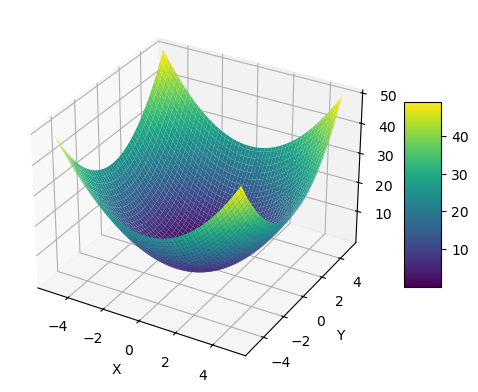

In [269]:

# Définir les limites de la grille
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

# Créer un maillage
X, Y = np.meshgrid(x, y)

# Définir la fonction
def func(X, Y):
    return X**2 + Y**2

# Calculer Z
Z = func(X, Y)

# Créer une figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Tracer la surface avec une colormap
surface = ax.plot_surface(X, Y, Z, cmap='viridis')

# Ajouter une barre de couleurs
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=5)

# Ajouter des labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Afficher le graphique
plt.show()


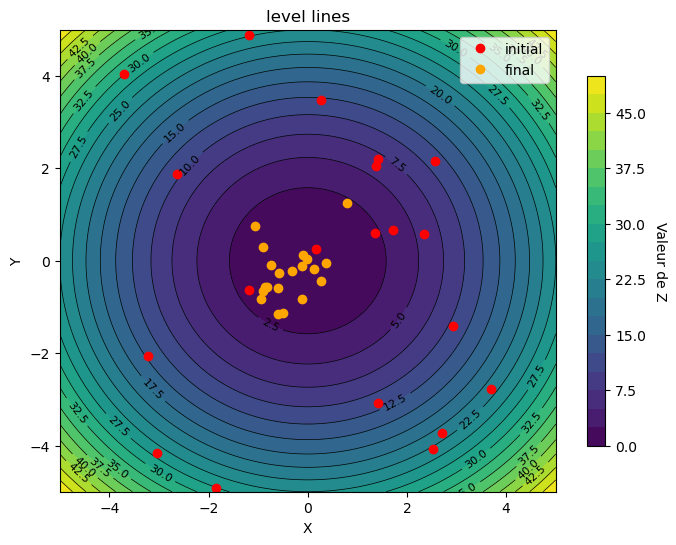

In [271]:


# Définir les limites de la grille
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

# Créer un maillage
X, Y = np.meshgrid(x, y)

# Définir la fonction
def func(X, Y):
    return X**2 + Y**2

# Calculer Z
Z = func(X, Y)

# Créer une figure
fig, ax = plt.subplots(figsize=(8, 6))

# Tracer les lignes de niveau remplies avec la colormap
contour_filled = ax.contourf(X, Y, Z, 20, cmap='viridis')

# Ajouter des lignes de niveau
contour_lines = ax.contour(X, Y, Z, 20, colors='black', linewidths=0.5)
plt.plot(dynamic[0][0,:], dynamic[0][1,:], marker = 'o', color = 'red', ls = '', label = 'initial')
plt.plot(dynamic[-1][0,:], dynamic[-1][1,:], marker = 'o', color = 'orange', ls = '', label = 'final')


# Ajouter une barre de couleurs pour indiquer le gradient
colorbar = fig.colorbar(contour_filled, ax=ax, orientation='vertical', shrink=0.8)
colorbar.set_label('Valeur de Z', rotation=270, labelpad=15)

# Ajouter des labels aux lignes de niveau
ax.clabel(contour_lines, inline=True, fontsize=8)

# Ajouter des labels aux axes
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Ajouter un titre
ax.set_title('level lines')
plt.legend()

# Afficher le graphique
plt.show()


In [284]:
norm_minimizer = np.sqrt(np.array([minimizer[i][0, 0] for i in range(len(minimizer))])**2 \
                       + np.array([minimizer[i][1, 0] for i in range(len(minimizer))])**2)

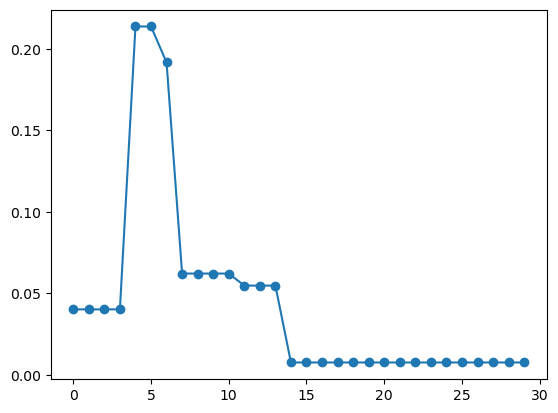

In [290]:
plt.plot(np.arange(T), norm_minimizer, marker = 'o')
plt.show()